In [1]:
from dataset import build_datasets, GTZANDataset
from torchaudio.transforms import MelSpectrogram
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload 2

## Playing with the dataset

Refer more to [this paper](https://arxiv.org/pdf/2111.11636.pdf) (Chapter 2: Input Representations) if you want to learn more.

In [2]:

transforms = MelSpectrogram(sample_rate = 22050, n_fft=800, n_mels=128)
train_dataset, valid_dataset, test_dataset = build_datasets(root="genres",
                                                            num_seconds_per_sample=5,
                                                            transforms=transforms)

In [3]:
audio, class_ = train_dataset[0]
print(f"Audio Shape: {audio.shape}")
print("Class idx:", class_)
print("Class name:", train_dataset.classes[class_])

Audio Shape: torch.Size([128, 276])
Class idx: 0
Class name: jazz


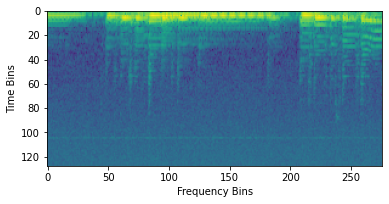

In [4]:
# Lower index of bin -> lower frequency
plt.imshow(audio.log()) # Why log? Because the smaller frequencies are usually more prevalant
plt.xlabel("Frequency Bins")
plt.ylabel("Time Bins")
plt.show()

## Usage with Dataloaders

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
for audio, classes in train_dataloader:
    print("Audio shape:", audio.shape)
    print("Classes shape:", classes.shape)
    print("Classes:", classes)
    break

Audio shape: torch.Size([32, 128, 276])
Classes shape: torch.Size([32])
Classes: tensor([1, 6, 9, 8, 8, 2, 8, 3, 1, 6, 8, 3, 7, 8, 6, 2, 9, 1, 3, 5, 5, 4, 2, 6,
        9, 2, 4, 0, 0, 4, 4, 8])
